# Project: Titanic Survival Prediction

##  Description:
### The sinking of the Titanic is one of the most infamous shipwrecks in history.

### On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

### While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

### In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” 

## Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('tested.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
df.shape

(418, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df[df.duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
df.describe().round(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.00,418.000,418.000,332.000,418.000,418.000,417.000
mean,1100.50,0.364,2.266,30.273,0.447,0.392,35.627
std,120.81,0.482,0.842,14.181,0.897,0.981,55.908
min,892.00,0.000,1.000,0.170,0.000,0.000,0.000
25%,996.25,0.000,1.000,21.000,0.000,0.000,7.896
50%,1100.50,0.000,3.000,27.000,0.000,0.000,14.454
75%,1204.75,1.000,3.000,39.000,1.000,0.000,31.500
max,1309.00,1.000,3.000,76.000,8.000,9.000,512.329


### 1. There are 418 rows and 12 columns present in our dataset.
### 2. There are some null values in Age,Fare and Cabin columns.
### 3. There is no duplicate values
### 4. Even though some are showing numerical type but actually they comes under categorical type.

### Numerical Columns:['PassengerID','Age','Fare','Sibsp','Parch']
### Categorical Columns:['Survived','Pclass','Name','Sex','Ticket','Cabin','Embarked']

In [10]:
#Checking for null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handling Null values

In [11]:
df.drop(['Cabin'],axis=1,inplace=True)

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [13]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Dropping Unnecessary Columns

In [15]:
df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


## EDA(Exploratory Data Analysis)

In [17]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [18]:
s_i = df['Survived'].value_counts().index
s_v = df['Survived'].value_counts().values

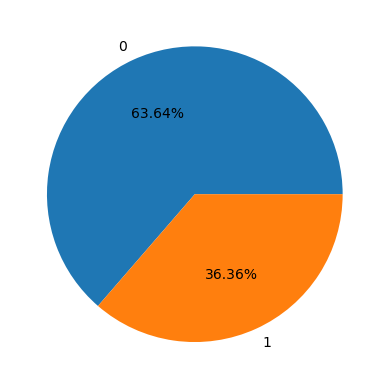

In [19]:
plt.pie(s_v,labels=s_i,autopct='%1.2f%%')
plt.show()

### In our dataset Total 266(63.64%) passengers are not survived and 152(36.36%) are survived.

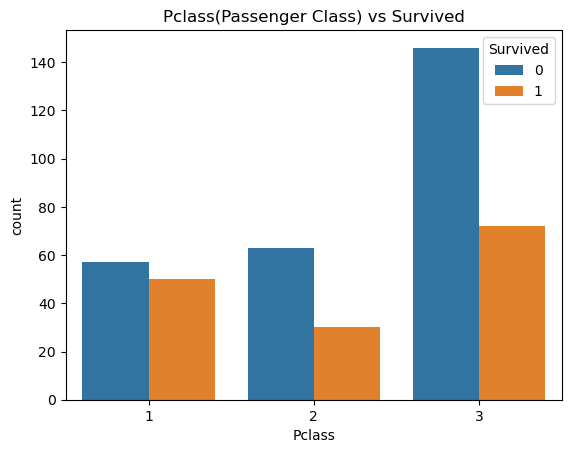

In [20]:
#Visualize Pclass vs Survived
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Pclass(Passenger Class) vs Survived')
plt.show()

### We can see that Pclass 1 have high survival rate compared to Pclass 2 and 3. And pclass 3 have low survival rate

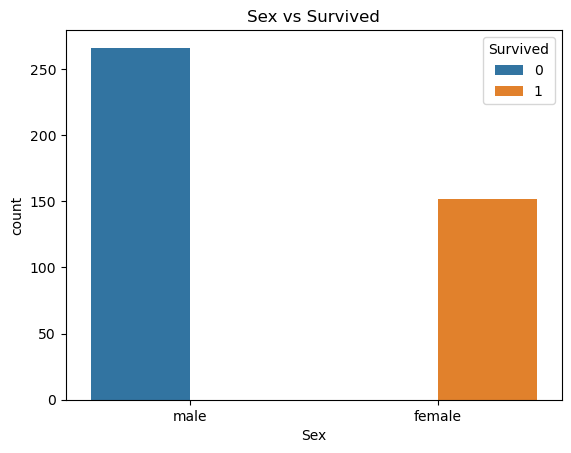

In [21]:
#Visualize Sex vs Survived
sns.countplot(x='Sex',hue='Survived', data=df)
plt.title('Sex vs Survived')
plt.show()

### Females have a high are survival rate compared to males,It aligns with 'Women and children' are first priority when it comes to emergenices

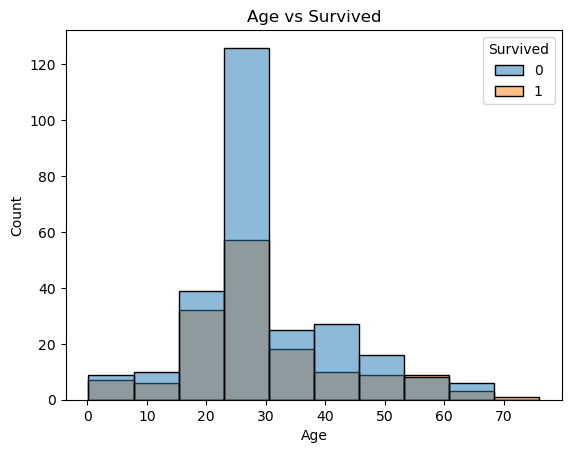

In [22]:
#Visualize Age vs Survived
sns.histplot(x='Age', hue='Survived', data=df, bins=10)
plt.title('Age vs Survived')
plt.show()

### 1. Here we can see that most of the passengers age inbetween 20-30.
### 2. Age between 52-60 passengers are more survived.

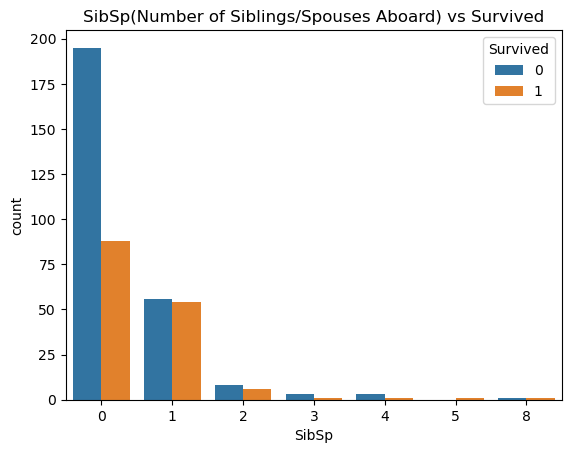

In [23]:
#Visualize SibSp vs Survived
sns.countplot(x='SibSp', hue='Survived', data=df)
plt.title('SibSp(Number of Siblings/Spouses Aboard) vs Survived')
plt.show()

### Passengers with one sibling/spouse have more survival rate, and Passengers with more siblings/spouses aboard seem to have a slightly lower survival rate.

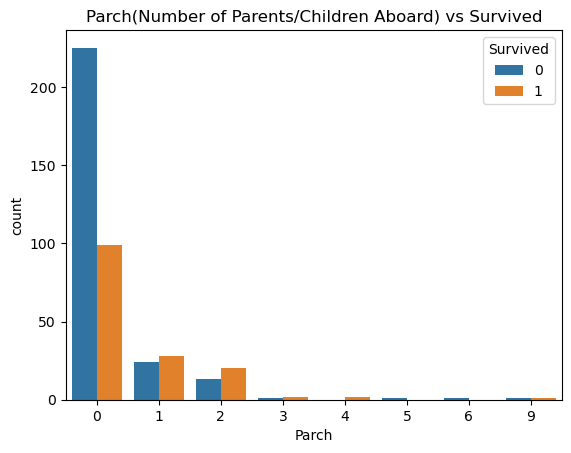

In [24]:
#Visualize Parch vs Survived
sns.countplot(x='Parch', hue='Survived', data=df)
plt.title('Parch(Number of Parents/Children Aboard) vs Survived')
plt.show()

### Passengers with one/two parents/children are survived more. And Passengers with more parents/children aboard also seem to have a slightly lower survival rate.

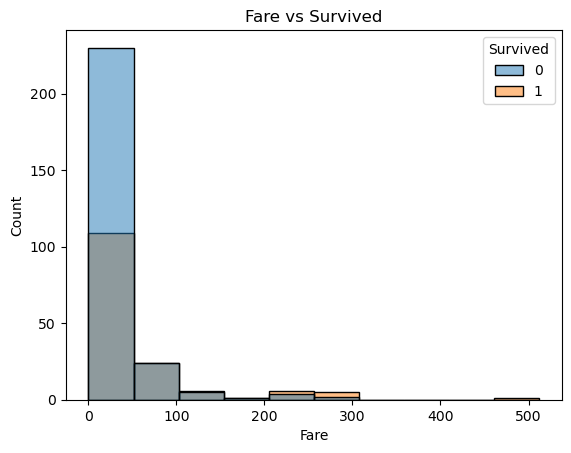

In [25]:
#Visualize Fare vs Survived
sns.histplot(x='Fare', hue='Survived', data=df, bins=10)
plt.title('Fare vs Survived')
plt.show()

### 1. There is wide range of fares,and distribution skewed towards lower fares.
### 2. Fare between 200-300 are survived more compared rest of all fares

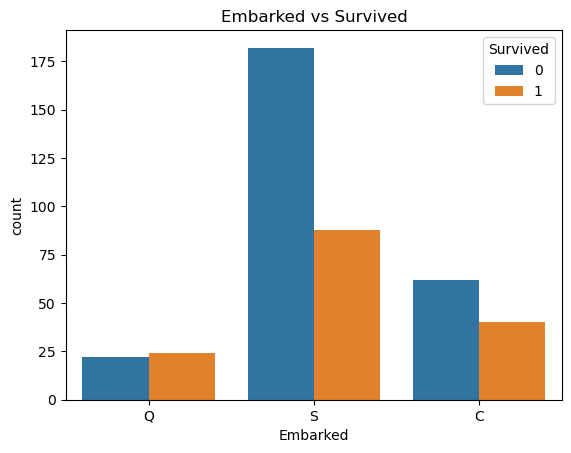

In [26]:
#Visualize Embarked vs Survived
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarked vs Survived')
plt.show()

### Embarkation stations(C = Cherbourg, Q = Queenstown, S = Southampton),Passengers who onboarded at Queenstown are survived compared to other stations

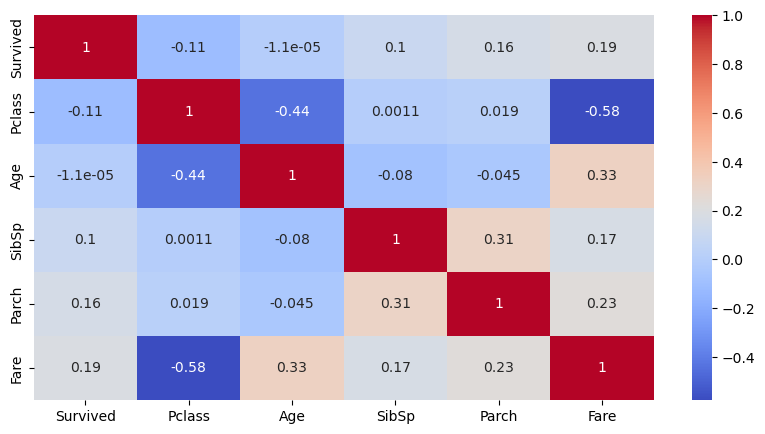

In [27]:
corr = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

### As we can see that Age,SibSp,Parch,Fare are positivly correlated with Survived(Target) variable

## Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Sex', 'Embarked']
for i in cols:
    df[i] = le.fit_transform(df[i])    

## Feature Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1 = df.copy()
df1[['Age','Fare']] = scaler.fit_transform(df1[['Age','Fare']])

## Data Preparation

In [30]:
X = df1.iloc[:,1:]
Y = df1.iloc[:,0]

In [31]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,0.452723,0,0,0.015282,1
1,3,0,0.617566,1,0,0.013663,2
2,2,1,0.815377,0,0,0.018909,1
3,3,1,0.353818,0,0,0.016908,2
4,3,0,0.287881,1,1,0.023984,2


In [32]:
Y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.20,random_state=100)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(334, 7)
(84, 7)
(334,)
(84,)


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
lr.fit(X_train,y_train)

LogisticRegression()

In [37]:
lr_prediction = lr.predict(X_test)

In [38]:
from sklearn import metrics

In [39]:
print(metrics.classification_report(y_test,lr_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        32

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [40]:
predicted_df = pd.DataFrame({'y_test':y_test,'y_predict':lr_prediction})

In [41]:
predicted_df

,y_test,y_predict
98,1,1
197,1,1
369,0,0
201,0,0
129,0,0
...,...,...
5,0,0
356,1,1
163,0,0
140,1,1
